In [1]:
#Import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline




In [2]:
from sklearn.cluster import KMeans

In [3]:
#J'importe mon jeu de données.Il s'agit ici d'un jeu de données e-commerce importé depuis mon ordinateur (pas depuis sklearn)
GA = pd.read_csv (r"C:\Users\penel\OneDrive\Documents\DATA SCIENCE GA COURSE\DATASETS\GA_Dataset_ 130318_V8.csv")

In [4]:
#Regardons à quoi ressemble le jeu de données en question.
#Vous remarquerez que des données qualitatives ont été transformées en données quantitatives, par ex: session time of day is PM etc...
#Sachez que cette manipulation est possible et utile mais ca n'est pas qqchose que nous aurons le temps d'étudier en detail.
GA.head()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days,Session revenue,Session Time of day is Evening,Session Time of day is PM,Session Time of day is night,Session Time of day is Morning,...,FT is Paid Search,FT is Affiliates,Session Channel is Direct,Session Channel is Social,Session Channel is Referrals,Session Channel is Display,Session Channel is Paid Search,Session Channel is Affiliates,is Tablet,Is Mobile
0,1,15.0,833.0,1,0,833.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,7,21.5,700.0,2,180,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,9.0,595.0,1,120,595.0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,7.5,476.0,1,120,476.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,5.0,476.0,1,0,476.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Quelle est la taille du jeu de données?
#Ici, nous avons 200 rangées et 48 colonnes.
GA.shape

(200, 48)

In [6]:
#Ici, j'élimine mes données encodées (les données qualitatives qui ont été transformées en données quantitatives).
#J'effectue cette étape de facon à rendre le travail d'interprétation plus facile.
GA.drop(GA.iloc[:, 5:48], inplace= True, axis = 1)

In [7]:
#Ici, je vérifie que mes données encodées ont bien disparu.
GA.head(3)

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
0,1,15.0,833.0,1,0
1,7,21.5,700.0,2,180
2,1,9.0,595.0,1,120


In [8]:
#Ici, je vérifie la nouvelle taille de mon jeu de données.
GA.shape

(200, 5)

In [9]:
#Ici, je vérifie que je n'ai pas de données manquantes.
GA.isnull().sum()

Sessions over 3 months           0
Avg. Session Duration in mins    0
Revenue over 3 months            0
Transactions over 3 months       0
Acquisition date in days         0
dtype: int64

In [10]:
GA.dtypes

Sessions over 3 months             int64
Avg. Session Duration in mins    float64
Revenue over 3 months            float64
Transactions over 3 months         int64
Acquisition date in days           int64
dtype: object

In [11]:
print (GA.columns)

Index(['Sessions over 3 months', 'Avg. Session Duration in mins',
       'Revenue over 3 months', 'Transactions over 3 months',
       'Acquisition date in days'],
      dtype='object')


In [12]:
GA.describe()
#Ici, je sors les valeurs clés pour chacune de mes données. 

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
count,200.00000,200.000000,200.000000,200.000000,200.000000
mean,1.36000,6.143250,39.019900,0.230000,6.910000
std,0.86843,9.042821,117.519427,0.456224,26.337811
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,0.900000,0.000000,0.000000,0.000000
50%,1.00000,2.500000,0.000000,0.000000,0.000000
75%,1.00000,8.000000,0.000000,0.000000,0.000000
max,7.00000,60.000000,833.000000,2.000000,180.000000


In [13]:
X = GA.iloc[:,0:5]

In [14]:
X.head()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
0,1,15.0,833.0,1,0
1,7,21.5,700.0,2,180
2,1,9.0,595.0,1,120
3,1,7.5,476.0,1,120
4,1,5.0,476.0,1,0


In [15]:
#Ici, je standardise mon jeu de données.
from sklearn.preprocessing import normalize

Xn = normalize(X)

In [19]:
Xn = pd.DataFrame(data=Xn,columns = ['Sessions over 3 months', 'Avg. Session Duration in mins', 'Revenue over 3 months', 'Transactions over 3 months', 'Acquisition date in days'])
Xn.describe()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.427094,0.563969,0.180386,0.003834,0.068952
std,0.366050,0.377731,0.372683,0.013025,0.220925
min,0.001200,0.000000,0.000000,0.000000,0.000000
25%,0.061608,0.159924,0.000000,0.000000,0.000000
50%,0.316228,0.707107,0.000000,0.000000,0.000000
75%,0.743294,0.950558,0.000000,0.000000,0.000000
max,1.000000,0.999742,0.999940,0.119523,0.999965


In [20]:
Xn.head()

,Sessions over 3 months,Avg. Session Duration in mins,Revenue over 3 months,Transactions over 3 months,Acquisition date in days
0,0.001200,0.018004,0.999836,0.001200,0.000000
1,0.009680,0.029732,0.968016,0.002766,0.248918
2,0.001647,0.014826,0.980152,0.001647,0.197678
3,0.002037,0.015276,0.969544,0.002037,0.244423
4,0.002101,0.010504,0.999940,0.002101,0.000000


In [21]:
from sklearn.cluster import KMeans

# Ici, je crée 2 Clusters
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
# Ici, 4 Clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
# Et ici, 6 Clusters
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(Xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
#Ici, je sors la valeur du cluster (0,1) qui a été attribuée à chaque observation/rangée par K-Means.
#J'imprime ensuite les coordonnées de mes 2 centroides.
labels_2 = k_mean2.labels_
print (labels_2)
clusters_2 = k_mean2.cluster_centers_
clusters_2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


array([[2.54819894e-02, 1.37958042e-01, 8.17265163e-01, 1.10674336e-02,
        2.21505955e-01],
       [5.40368793e-01, 6.84126234e-01, 7.53821836e-04, 1.79375222e-03,
        2.59234542e-02]])

In [25]:
#Ici, je sors la valeur du cluster (0,1,2,3) qui a été attribuée à chaque observation/rangée par K-Means.
#J'imprime ensuite les coordonnées de mes 4 centroides.
labels_4 = k_mean4.labels_
print (labels_4)
clusters_4 = k_mean4.cluster_centers_
clusters_4

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 3 2 2 0
 2 2 0 1 1 3 1 1 1 1 1 3 1 1 1 1 1 3 1 0 1 1 1 3 1 1 1 3 3 1 3 1 3 1 3 3 3
 1 3 3 3 3 3 1 3 3 1 3 3 1 3 1 3 3 1 3 1 1 1 3 1 1 1 1 1 3 1 1 3 1 3 1 1 1
 3 3 1 1 3 3 1 3 0 3 1 3 3 3 3 3 3 3 3 3 1 3 3 0 3 1 3 3 3 3 3 1 1 3 3 3 3
 3 3 1 1 3 3 1 1 3 3 1 1 3 0 0 1 1 1 1 1 0 3 1 3 3 3 3 1 1 1 3 3 0 1 1 3 3
 1 3 0 3 1 1 3 1 1 3 1 1 1 3 3]


array([[ 1.27557475e-01,  2.27819990e-01,  7.17366798e-02,
         1.68968640e-02,  9.10678425e-01],
       [ 8.54258551e-01,  4.22076712e-01, -1.66533454e-16,
         3.03576608e-18,  5.96284794e-03],
       [ 1.55554170e-02,  1.25981335e-01,  9.63389346e-01,
         1.22357815e-02,  8.52765362e-02],
       [ 2.48541292e-01,  9.49958268e-01,  7.77107010e-03,
         1.80049724e-03,  3.27806780e-03]])

In [26]:
#Ici, je sors la valeur du cluster (0,1,2,3,4,5) qui a été attribuée à chaque observation/rangée par K-Means.
#J'imprime ensuite les coordonnées de mes 6 centroides.

labels_6 = k_mean6.labels_
print (labels_6)
clusters_6 = k_mean6.cluster_centers_
clusters_6

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 0 2 2 4
 2 2 4 5 5 0 5 1 5 5 3 0 5 5 1 3 5 0 1 4 3 5 5 0 3 5 1 3 0 5 0 3 0 1 3 0 0
 1 0 0 3 0 0 3 0 0 5 0 3 5 3 5 3 0 3 0 3 5 3 3 1 1 1 1 5 0 5 5 0 5 0 5 5 3
 0 0 1 1 0 0 3 0 4 0 5 0 3 0 0 3 0 3 0 3 1 0 0 4 0 1 3 3 0 0 3 1 3 0 0 0 0
 0 0 3 3 0 0 3 3 0 0 1 3 0 4 4 3 5 3 5 5 4 3 3 3 0 0 3 3 1 1 0 0 4 1 3 0 0
 3 0 4 0 1 3 0 3 3 0 1 3 3 0 0]


array([[ 1.78122653e-01,  9.74120531e-01,  9.93677816e-03,
         2.30227516e-03,  4.19162768e-03],
       [ 8.86676242e-01,  4.59568830e-01,  5.55111512e-17,
        -8.67361738e-19, -2.77555756e-17],
       [ 1.55554170e-02,  1.25981335e-01,  9.63389346e-01,
         1.22357815e-02,  8.52765362e-02],
       [ 6.27635179e-01,  7.67092566e-01, -8.32667268e-17,
         2.16840434e-18,  2.77555756e-17],
       [ 1.27557475e-01,  2.27819990e-01,  7.17366798e-02,
         1.68968640e-02,  9.10678425e-01],
       [ 9.89474849e-01,  8.31167329e-02,  2.77555756e-17,
        -1.30104261e-18,  1.72005229e-02]])

In [27]:
#Le score silhouette donne une indication de la performance/qualité du modele.
#Plus le score est proche de 1, plus le modele est performant/intéressant car cela indique que les clusters ont été bien "séparés"
from sklearn.metrics import silhouette_score

In [28]:
silhouette_score(Xn, labels_2)

0.5691153235608115

In [29]:
silhouette_score(Xn, labels_4)

0.6514218760577131

In [30]:
silhouette_score(Xn, labels_6)

0.6852690184244494

In [31]:
#Ici je transforme ma dataframe Xn en numpy array/matrice pour pouvoir un code qui me permet de visualiser de facon précise.
Xn1 = Xn.to_numpy()

Text(0,0.5,'Avg. Session Duration in mins')

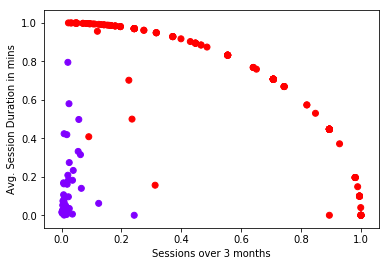

In [32]:
plt.scatter(Xn1[:,0],Xn1[:,1], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("Sessions over 3 months")
plt.ylabel("Avg. Session Duration in mins")




Text(0,0.5,'Avg. Session Duration in mins')

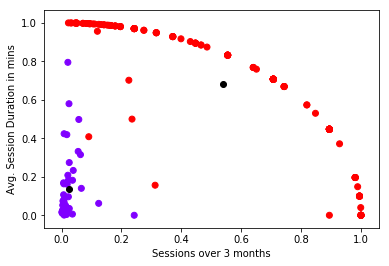

In [33]:
#Ici, on ajoute les centroides en noir
plt.scatter(Xn1[:,0],Xn1[:,1], c=k_mean2.labels_, cmap='rainbow')
plt.scatter(clusters_2[:,0] ,clusters_2[:,1], color='black')
plt.xlabel("Sessions over 3 months")
plt.ylabel("Avg. Session Duration in mins")

Text(0,0.5,'Avg. Session Duration in mins')

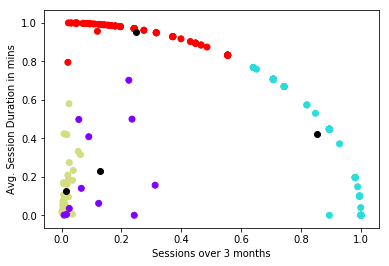

In [34]:
#Visualisons avec 4 clusters
plt.scatter(Xn1[:,0],Xn1[:,1], c=k_mean4.labels_, cmap='rainbow')
plt.scatter(clusters_4[:,0] ,clusters_4[:,1], color='black')
plt.xlabel("Sessions over 3 months")
plt.ylabel("Avg. Session Duration in mins")